In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn
from sklearn import metrics


In [3]:
dataset=pd.read_csv('./FinalSetOfData.csv')
dataset

,Date,miniTemp,maxTemp,humidityAt3,humidityAt12,precipitation
0,1/1/2010,10.0,19.0,92.50,91.10,0.0
1,1/2/2010,10.5,22.7,77.70,95.70,0.0
2,1/3/2010,10.0,18.5,94.80,95.30,0.0
3,1/4/2010,8.5,18.5,89.60,100.00,0.0
4,1/5/2010,7.0,21.5,97.20,100.00,0.0
...,...,...,...,...,...,...
4371,12/27/2021,13.0,24.0,67.56,79.82,0.0
4372,12/28/2021,12.6,24.0,67.62,76.69,0.0
4373,12/29/2021,16.0,18.5,95.04,82.33,0.1
4374,12/30/2021,12.5,24.0,71.48,79.92,5.7


In [6]:
print(dataset.describe())

          miniTemp      maxTemp  humidityAt3  humidityAt12  precipitation
count  4376.000000  4376.000000  4376.000000   4376.000000    4376.000000
mean     20.218053    29.857313    80.244637     82.382729       5.737361
std       5.031388     4.007211    12.064301     13.205556      17.013509
min       1.900000     9.000000    32.800000      8.600000       0.000000
25%      16.200000    27.500000    72.230000     75.700000       0.000000
50%      21.500000    31.000000    81.700000     85.200000       0.000000
75%      24.500000    32.825000    89.700000     92.200000       2.200000
max      28.000000    38.800000   100.000000    100.000000     292.900000


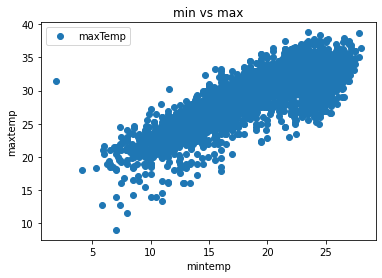

In [7]:
dataset.plot(x='miniTemp', y='maxTemp', style='o')
plt.title('min vs max')
plt.xlabel('mintemp')
plt.ylabel('maxtemp')
plt.show()


C:\Users\Acer\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


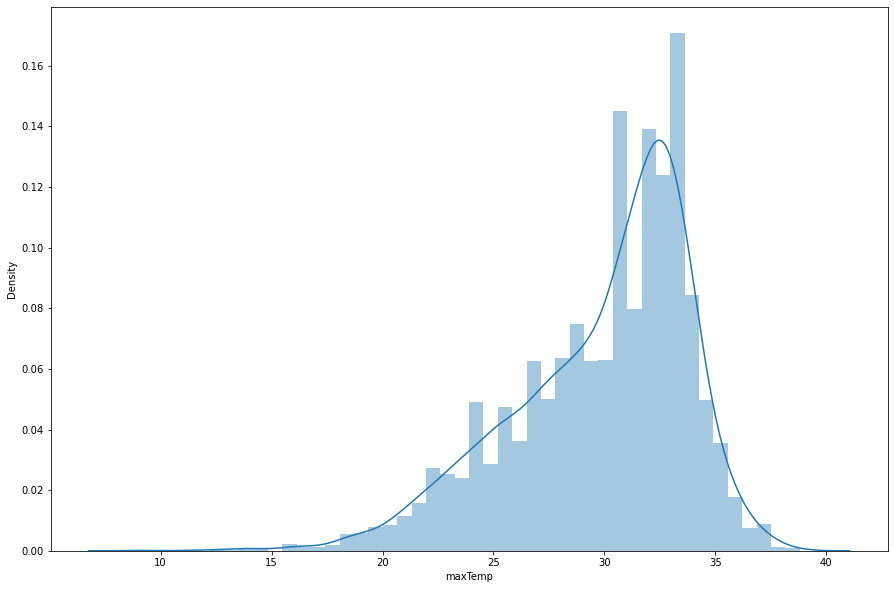

In [8]:
plt.figure(figsize=(15, 10))
plt.tight_layout()
seaborn.distplot(dataset['maxTemp'])
plt.show()


In [9]:
X= dataset['miniTemp'].values.reshape(-1,1)
y= dataset['maxTemp'].values.reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [10]:
model =LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [11]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


LinearRegression(normalize=False)

In [12]:
print('Intercept is :',model.intercept_)

Intercept is : [16.39303203]


In [13]:
print('Coefficient is :' ,model.coef_)

Coefficient is : [[0.66661418]]


In [14]:
y_pred= model.predict(X_test)

In [15]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df)


     Actual  Predicted
0      29.7  33.058387
1      27.7  25.658969
2      32.0  32.991725
3      29.1  33.791662
4      31.4  29.392009
..      ...        ...
871    35.0  34.058308
872    30.5  33.725001
873    30.4  30.725237
874    29.5  29.392009
875    26.9  26.325583

[876 rows x 2 columns]


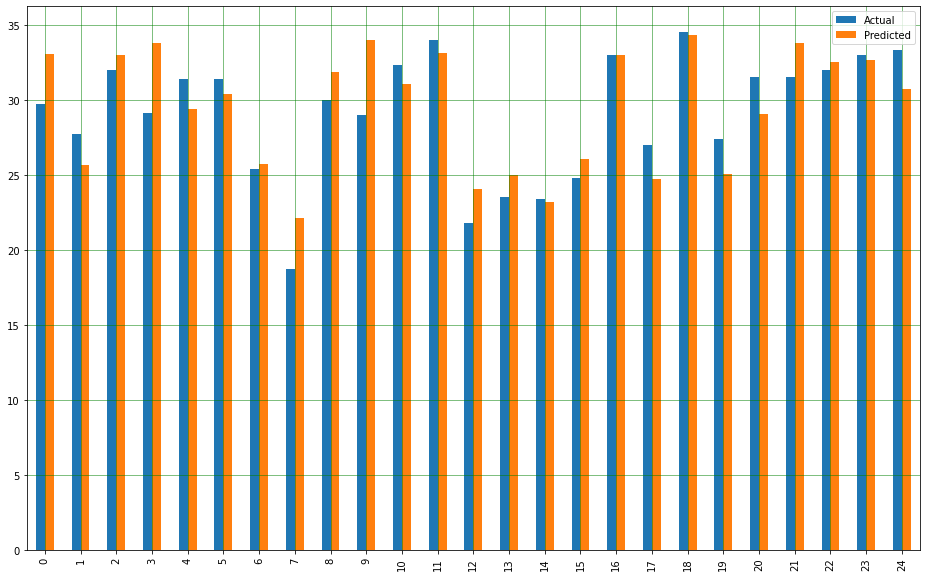

In [16]:
df1 = df.head(25)
df1.plot(kind='bar', figsize=(16, 10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


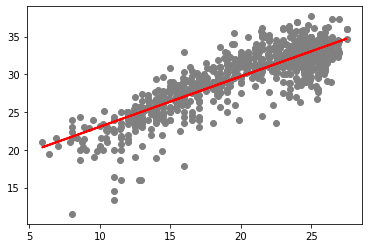

In [17]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()


In [18]:
print('Mean abolute error is:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean squared error is:', metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error is:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean abolute error is: 1.5870390383359572
Mean squared error is: 4.67755407529236
Root mean squared error is: 2.162765376847974
